In [19]:
from akshare import stock_zh_index_daily_em

stock_zh_index_daily_em_df = stock_zh_index_daily_em(symbol="sz000063", start_date="20000101", end_date="20191230")
print(stock_zh_index_daily_em_df)


            date   open  close   high    low  volume        amount
0     2000-01-04  28.60  29.89  30.50  28.55   15639  4.660794e+07
1     2000-01-05  29.81  29.54  30.33  29.40   19238  5.755673e+07
2     2000-01-06  29.08  31.54  32.00  29.08   29076  8.938891e+07
3     2000-01-07  31.54  32.50  33.08  31.54   50049  1.624412e+08
4     2000-01-10  32.88  32.89  33.08  31.55   31551  1.026134e+08
...          ...    ...    ...    ...    ...     ...           ...
4685  2019-12-24  32.41  33.12  33.24  32.20  670343  2.202159e+09
4686  2019-12-25  32.93  33.75  34.21  32.83  824519  2.781527e+09
4687  2019-12-26  33.78  33.90  34.05  33.45  456105  1.539565e+09
4688  2019-12-27  34.01  33.64  34.28  33.50  639171  2.167930e+09
4689  2019-12-30  33.38  34.35  34.63  33.21  861985  2.953553e+09

[4690 rows x 7 columns]


In [20]:
# Filter the dataframe for training and validation sets
training_set = stock_zh_index_daily_em_df[stock_zh_index_daily_em_df['date'].str.startswith('2019') == False]
validation_set = stock_zh_index_daily_em_df[stock_zh_index_daily_em_df['date'].str.startswith('2019')]

# Print the training set
print("Training Set:")
print(training_set)

# Print the validation set
print("Validation Set:")
print(validation_set)


Training Set:
            date   open  close   high    low   volume        amount
0     2000-01-04  28.60  29.89  30.50  28.55    15639  4.660794e+07
1     2000-01-05  29.81  29.54  30.33  29.40    19238  5.755673e+07
2     2000-01-06  29.08  31.54  32.00  29.08    29076  8.938891e+07
3     2000-01-07  31.54  32.50  33.08  31.54    50049  1.624412e+08
4     2000-01-10  32.88  32.89  33.08  31.55    31551  1.026134e+08
...          ...    ...    ...    ...    ...      ...           ...
4442  2018-12-24  19.36  20.26  20.26  19.22  1457015  2.900553e+09
4443  2018-12-25  19.97  20.36  20.65  19.70  1354728  2.732447e+09
4444  2018-12-26  20.22  19.86  20.33  19.72   832376  1.666645e+09
4445  2018-12-27  20.22  19.90  20.46  19.90   817253  1.647413e+09
4446  2018-12-28  19.73  19.59  19.87  19.01   738373  1.443105e+09

[4447 rows x 7 columns]
Validation Set:
            date   open  close   high    low   volume        amount
4447  2019-01-02  19.60  19.56  20.06  19.40   649683  1.2809

In [21]:
import numpy as np
import pandas as pd
# 计算相对于昨日收盘价的变化
training_set = training_set.copy()  # 创建一个副本
training_set.loc[:,'change'] = training_set['close'].pct_change()
training_set.loc[0, 'change'] = 0
filtered_training_set = training_set[(training_set['change'] >= -0.05) & (training_set['change'] <= 0.05)]

print(filtered_training_set)

            date   open  close   high    low   volume        amount    change
0     2000-01-04  28.60  29.89  30.50  28.55    15639  4.660794e+07  0.000000
1     2000-01-05  29.81  29.54  30.33  29.40    19238  5.755673e+07 -0.011710
3     2000-01-07  31.54  32.50  33.08  31.54    50049  1.624412e+08  0.030438
4     2000-01-10  32.88  32.89  33.08  31.55    31551  1.026134e+08  0.012000
6     2000-01-12  30.81  29.27  31.48  29.01    17202  5.135649e+07 -0.047201
...          ...    ...    ...    ...    ...      ...           ...       ...
4441  2018-12-21  19.23  19.24  19.53  19.04   640819  1.233242e+09 -0.006198
4443  2018-12-25  19.97  20.36  20.65  19.70  1354728  2.732447e+09  0.004936
4444  2018-12-26  20.22  19.86  20.33  19.72   832376  1.666645e+09 -0.024558
4445  2018-12-27  20.22  19.90  20.46  19.90   817253  1.647413e+09  0.002014
4446  2018-12-28  19.73  19.59  19.87  19.01   738373  1.443105e+09 -0.015578

[4132 rows x 8 columns]


In [22]:

bins = np.arange(-0.05, 0.06, 0.01)
labels = range(len(bins)-1)
# 标记涨跌状态
filtered_training_set = filtered_training_set.copy()  # 创建一个副本
filtered_training_set.loc[:,'state'] = pd.cut(filtered_training_set['change'], bins=bins, labels=labels)

# 打印训练集
print("训练集：")
print(filtered_training_set)


训练集：
            date   open  close   high    low   volume        amount    change  \
0     2000-01-04  28.60  29.89  30.50  28.55    15639  4.660794e+07  0.000000   
1     2000-01-05  29.81  29.54  30.33  29.40    19238  5.755673e+07 -0.011710   
3     2000-01-07  31.54  32.50  33.08  31.54    50049  1.624412e+08  0.030438   
4     2000-01-10  32.88  32.89  33.08  31.55    31551  1.026134e+08  0.012000   
6     2000-01-12  30.81  29.27  31.48  29.01    17202  5.135649e+07 -0.047201   
...          ...    ...    ...    ...    ...      ...           ...       ...   
4441  2018-12-21  19.23  19.24  19.53  19.04   640819  1.233242e+09 -0.006198   
4443  2018-12-25  19.97  20.36  20.65  19.70  1354728  2.732447e+09  0.004936   
4444  2018-12-26  20.22  19.86  20.33  19.72   832376  1.666645e+09 -0.024558   
4445  2018-12-27  20.22  19.90  20.46  19.90   817253  1.647413e+09  0.002014   
4446  2018-12-28  19.73  19.59  19.87  19.01   738373  1.443105e+09 -0.015578   

     state  
0        

Transition Matrix:
state         0         1         2         3         4         5         6  \
state                                                                         
0      0.093750  0.052083  0.083333  0.145833  0.125000  0.229167  0.125000   
1      0.016667  0.061111  0.088889  0.116667  0.200000  0.205556  0.144444   
2      0.021021  0.048048  0.084084  0.162162  0.192192  0.228228  0.120120   
3      0.021559  0.039801  0.056385  0.121061  0.217247  0.194030  0.152570   
4      0.018286  0.041143  0.086857  0.136000  0.224000  0.186286  0.145143   
5      0.025424  0.033898  0.098063  0.161017  0.240920  0.193705  0.111380   
6      0.023810  0.054945  0.084249  0.166667  0.205128  0.184982  0.109890   
7      0.028986  0.046377  0.066667  0.130435  0.194203  0.237681  0.144928   
8      0.018605  0.032558  0.051163  0.186047  0.153488  0.237209  0.148837   
9      0.000000  0.062500  0.089286  0.107143  0.232143  0.151786  0.133929   

state         7         8       

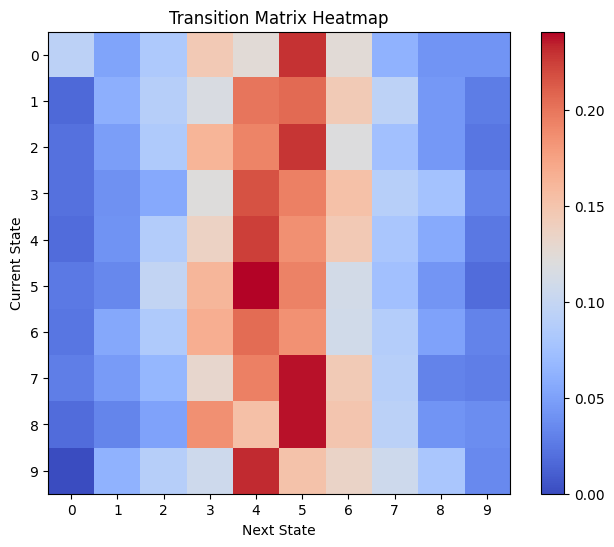

In [23]:
# 计算转移矩阵
transition_matrix = pd.crosstab(index=filtered_training_set['state'],columns=filtered_training_set['state'].shift(1),normalize='index')

print("Transition Matrix:")
print(transition_matrix)

import matplotlib.pyplot as plt

# 热力图可视化
plt.figure(figsize=(8, 6))
plt.imshow(transition_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Transition Matrix Heatmap')
plt.xlabel('Next State')
plt.ylabel('Current State')
plt.xticks(range(len(transition_matrix.columns)), transition_matrix.columns)
plt.yticks(range(len(transition_matrix.index)), transition_matrix.index)
plt.show()


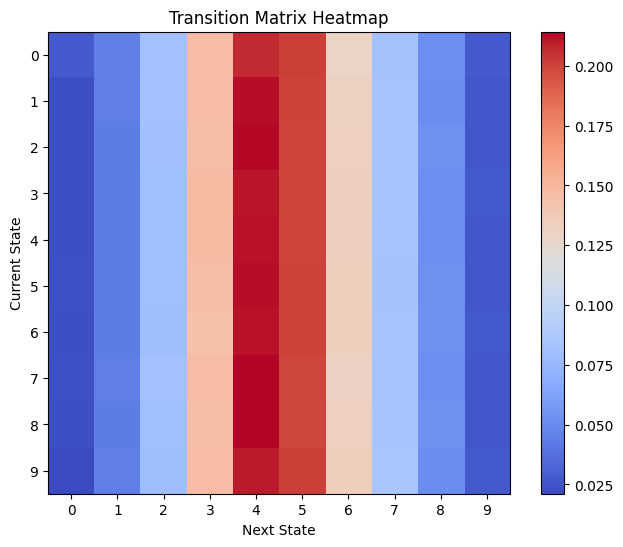

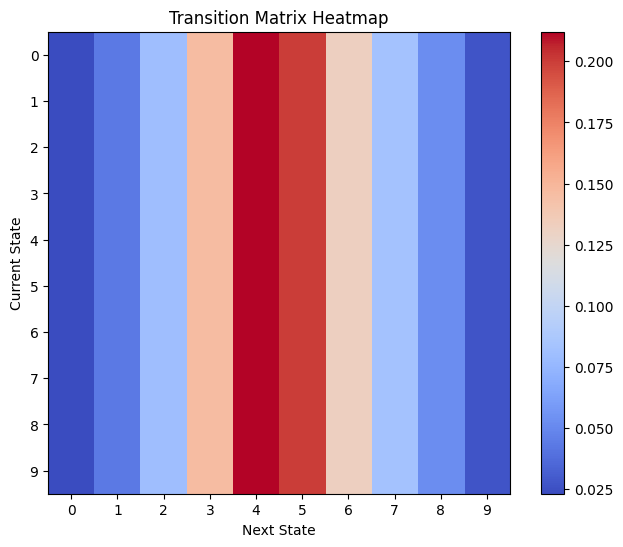

In [26]:
steps = 2
previous_matrix = transition_matrix.copy()

while steps > 0:
    new_matrix = previous_matrix.dot(previous_matrix)
    previous_matrix = new_matrix
    steps -= 1
    plt.figure(figsize=(8, 6))
    plt.imshow(new_matrix, cmap='coolwarm', interpolation='nearest')
    plt.colorbar()
    plt.title('Transition Matrix Heatmap')
    plt.xlabel('Next State')
    plt.ylabel('Current State')
    plt.xticks(range(len(transition_matrix.columns)), transition_matrix.columns)
    plt.yticks(range(len(transition_matrix.index)), transition_matrix.index)
    plt.show()
    
